In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,mean_squared_error,r2_score,auc
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RepeatedKFold,LeaveOneOut,GridSearchCV,permutation_test_score,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr,ttest_ind,levene
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.feature_selection import VarianceThreshold

In [2]:
xlsx1_filePath = '/Users/icolaice/Desktop/71to227_label0.xlsx'
xlsx2_filePath = '/Users/icolaice/Desktop/71to227_label1.xlsx'
data_1  = pd.read_excel(xlsx1_filePath)
data_2  = pd.read_excel(xlsx2_filePath)
data = pd.concat([data_1, data_2])
data = shuffle(data)
data = data.fillna(0)
X = data[data.columns[1: ]]

In [3]:
index = []
selector = VarianceThreshold(1e21)  #1乘以10的20次方 
selector.fit_transform(X)

print('每个特征的方差为:' + str(selector.variances_))
print('筛选出的特征序号为:' + str(selector.get_support(True)))
print('筛选出的特征名称为:' + str(X.columns[selector.get_support(True)]))
print('筛选掉的特征名称为:' + str(X.columns[~ selector.get_support()]))    #~指取反

每个特征的方差为:[1.97463015e-02 1.93669463e-02 1.65200781e+02 ... 8.07480378e+08
 9.87758472e-02 1.36125901e+02]
筛选出的特征序号为:[  16   29  183  184  185  369  370  371  946  959 1039 1052 1113 1114
 1115 1132 1145 1876 1889]
筛选出的特征名称为:Index(['original_firstorder_Energy', 'original_firstorder_TotalEnergy',
       'exponential_glszm_LargeAreaEmphasis',
       'exponential_glszm_LargeAreaHighGrayLevelEmphasis',
       'exponential_glszm_LargeAreaLowGrayLevelEmphasis',
       'lbp-2D_glszm_LargeAreaEmphasis',
       'lbp-2D_glszm_LargeAreaHighGrayLevelEmphasis',
       'lbp-2D_glszm_LargeAreaLowGrayLevelEmphasis',
       'logarithm_firstorder_Energy', 'logarithm_firstorder_TotalEnergy',
       'square_firstorder_Energy', 'square_firstorder_TotalEnergy',
       'square_glszm_LargeAreaEmphasis',
       'square_glszm_LargeAreaHighGrayLevelEmphasis',
       'square_glszm_LargeAreaLowGrayLevelEmphasis',
       'squareroot_firstorder_Energy', 'squareroot_firstorder_TotalEnergy',
       'wavelet-LLL_firstor

##
exponential_glszm_LargeAreaEmphasis
exponential_glszm_LargeAreaHighGrayLevelEmphasis
exponential_glszm_LargeAreaLowGrayLevelEmphasis
lbp-2D_glszm_LargeAreaEmphasis
lbp-2D_glszm_LargeAreaHighGrayLevelEmphasis
lbp-2D_glszm_LargeAreaLowGrayLevelEmphasis

ICC小于0.75，舍弃

In [4]:
data_1 = data_1[['original_firstorder_Energy', 'original_firstorder_TotalEnergy',
       'logarithm_firstorder_Energy', 'logarithm_firstorder_TotalEnergy',
       'square_firstorder_Energy', 'square_firstorder_TotalEnergy',
       'square_glszm_LargeAreaEmphasis',
       'square_glszm_LargeAreaHighGrayLevelEmphasis',
       'square_glszm_LargeAreaLowGrayLevelEmphasis',
       'squareroot_firstorder_Energy', 'squareroot_firstorder_TotalEnergy',
       'wavelet-LLL_firstorder_Energy', 'wavelet-LLL_firstorder_TotalEnergy']]
data_2 = data_2[['original_firstorder_Energy', 'original_firstorder_TotalEnergy',
       'logarithm_firstorder_Energy', 'logarithm_firstorder_TotalEnergy',
       'square_firstorder_Energy', 'square_firstorder_TotalEnergy',
       'square_glszm_LargeAreaEmphasis',
       'square_glszm_LargeAreaHighGrayLevelEmphasis',
       'square_glszm_LargeAreaLowGrayLevelEmphasis',
       'squareroot_firstorder_Energy', 'squareroot_firstorder_TotalEnergy',
       'wavelet-LLL_firstorder_Energy', 'wavelet-LLL_firstorder_TotalEnergy']]
rows_1,__ = data_1.shape
rows_2,__ = data_2.shape
data_1.insert(0, 'label', [0] *rows_1)
data_2.insert(0, 'label', [1] *rows_2)
data = pd.concat([data_1,data_2])
data = shuffle(data)
data.index = range(len(data))   #打乱后重新标号
X = data[data.columns[1:]]
y = data['label']
X = X.apply(pd.to_numeric,errors = 'ignore')  #将数据类型转化为数值型
colNames = X.columns   #读取特征的名字
X = X.fillna(0)
X = X.astype(np.float64)
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.columns = colNames

recall_score 0.646
f1_score 0.630
accuracy_score 0.646


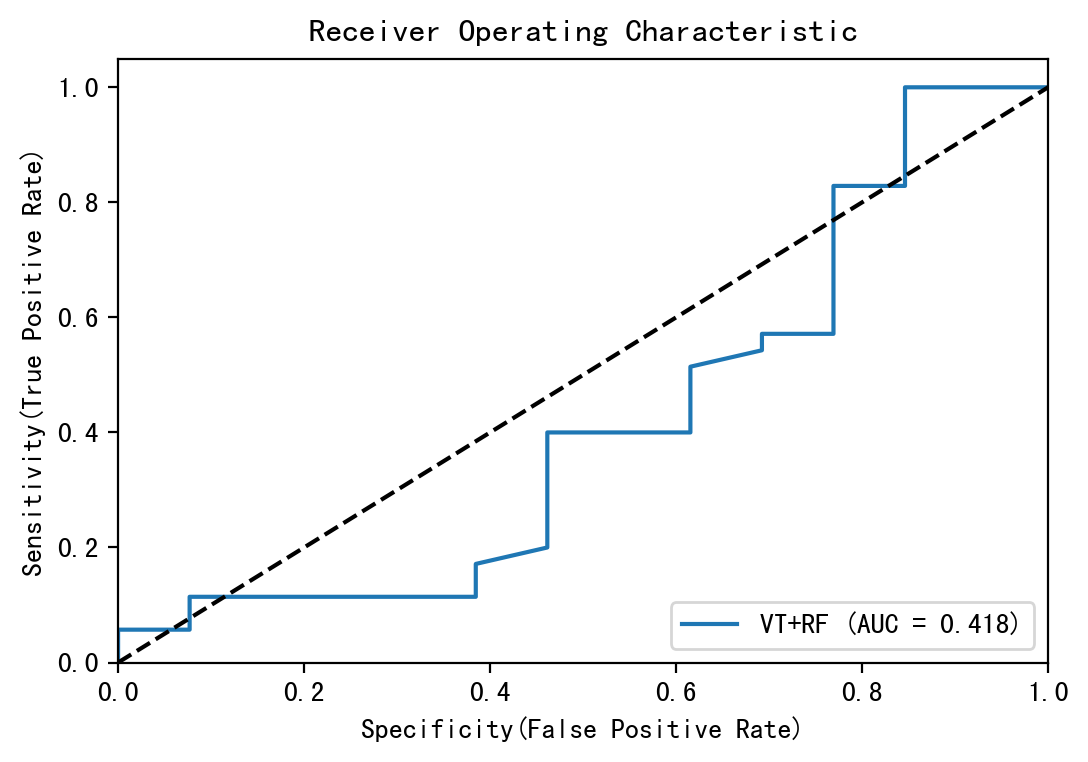

In [8]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

plt.figure(dpi =200)

rf = RandomForestClassifier(n_estimators = 250)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
rf.fit(X_train, y_train) # train the model
y_pred=rf.predict(X_test) # predict the test data

# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1]) #到底是用predic还是predict_proba？
# Calculate Area under the curve to display on the plot
#auc = metrics.roc_auc_score(y_test,model.predict(X_test))
auc1 = metrics.auc(fpr, tpr)
    
#report
print('recall_score', '%0.3f' % recall_score(y_test, y_pred, average='weighted'))
#print('%s Specificity:'% m['label'], '%0.3f' % (1-recall_score(y_true, y_pred, average='weighted'))) #特异度如何计算？

print('f1_score', '%0.3f' % f1_score(y_test, y_pred, average='weighted'))
print('accuracy_score', '%0.3f' % accuracy_score(y_test, y_pred))  # 0.5
#print('')
    
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s (AUC = %0.3f)' % ('VT+RF', auc1))
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

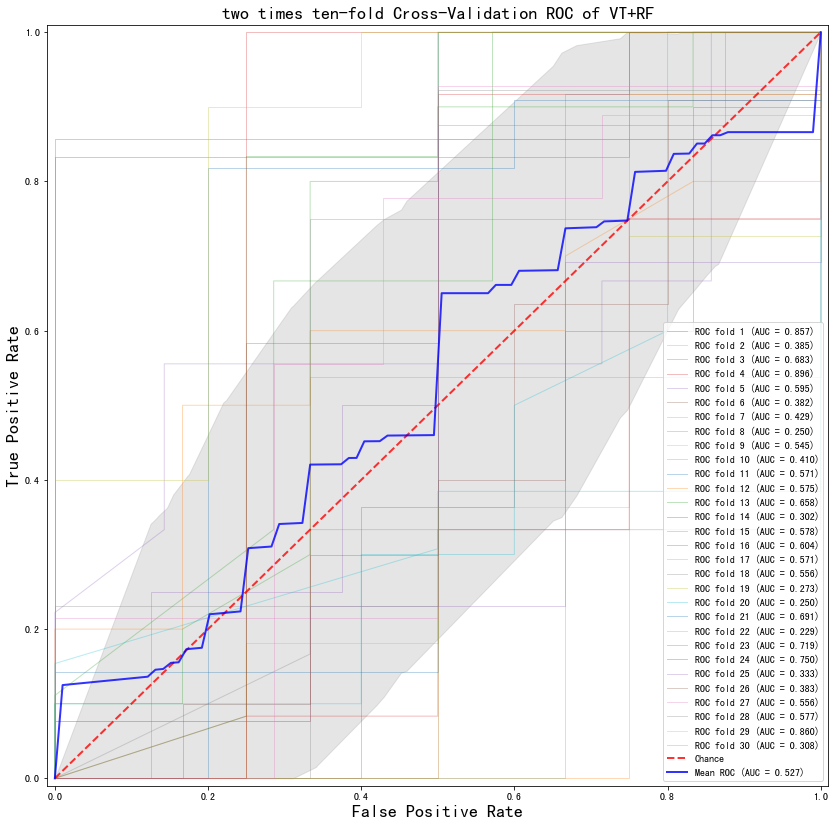

In [15]:
#交叉验证

#分类器
classifier = rf

#交叉验证参数
rkf = RepeatedKFold(n_splits = 10,n_repeats =3)   #分10份，重复2次，即2折10次


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(14,14))

i = 0
for train_index,test_index in rkf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test,probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.3f)' % (i+1, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.3f)' % (mean_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)   #阴影

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('two times ten-fold Cross-Validation ROC of VT+RF',fontsize=18)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [18]:
#保存模型

import joblib  #直接导入
modelPath = '/Users/icolaice/Desktop/model/vt_rf.model'
joblib.dump(rf,modelPath)


['/Users/icolaice/Desktop/model/vt_rf.model']

In [21]:
#载入模型

model_vt_rf_load = joblib.load(modelPath)
score_vt_rf = model_vt_rf_load.score(X_test,y_test)
print(score_vt_rf)

0.8


In [ ]:
#验证集数据

yzxlsx1_filePath = '/Users/icolaice/Desktop/1to70_label0.xlsx'
yzxlsx2_filePath = '/Users/icolaice/Desktop/1to70_label1.xlsx'
yzdata_1  = pd.read_excel(yzxlsx1_filePath)
yzdata_2  = pd.read_excel(yzxlsx2_filePath)
yzdata = pd.concat([yzdata_1, yzdata_2])
yzdata = shuffle(yzdata)
yzdata = yzdata.fillna(0)
yzX = yzdata[yzdata.columns[1: ]]




plt.figure(dpi =200)

rf = RandomForestClassifier(n_estimators = 250)
yzX_train,yzX_test,yzy_train,yzy_test = train_test_split(yzX,yzy,test_size = 0.3)
rf.fit(X_train, y_train) # train the model
y_pred=rf.predict(X_test) # predict the test data

# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1]) #到底是用predic还是predict_proba？
# Calculate Area under the curve to display on the plot
#auc = metrics.roc_auc_score(y_test,model.predict(X_test))
auc1 = metrics.auc(fpr, tpr)
    
#report
print('recall_score', '%0.3f' % recall_score(y_test, y_pred, average='weighted'))
#print('%s Specificity:'% m['label'], '%0.3f' % (1-recall_score(y_true, y_pred, average='weighted'))) #特异度如何计算？

print('f1_score', '%0.3f' % f1_score(y_test, y_pred, average='weighted'))
print('accuracy_score', '%0.3f' % accuracy_score(y_test, y_pred))  # 0.5
#print('')
    
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s (AUC = %0.3f)' % ('VT+RF', auc1))
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

/var/folders/kc/_zgf3jk536lf5q7ndtfb1kwc0000gn/T/ipykernel_1297/202191203.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
/var/folders/kc/_zgf3jk536lf5q7ndtfb1kwc0000gn/T/ipykernel_1297/202191203.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
/var/folders/kc/_zgf3jk536lf5q7ndtfb1kwc0000gn/T/ipykernel_1297/202191203.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
/var/folders/kc/_zgf3jk536lf5q7ndtfb1kwc0000gn/T/ipykernel_1297/202191203.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
/var/folders/kc/_zgf3jk536lf5q7ndtfb1kwc0000gn/T/ipykernel_1297/202191203.py:36: Dep

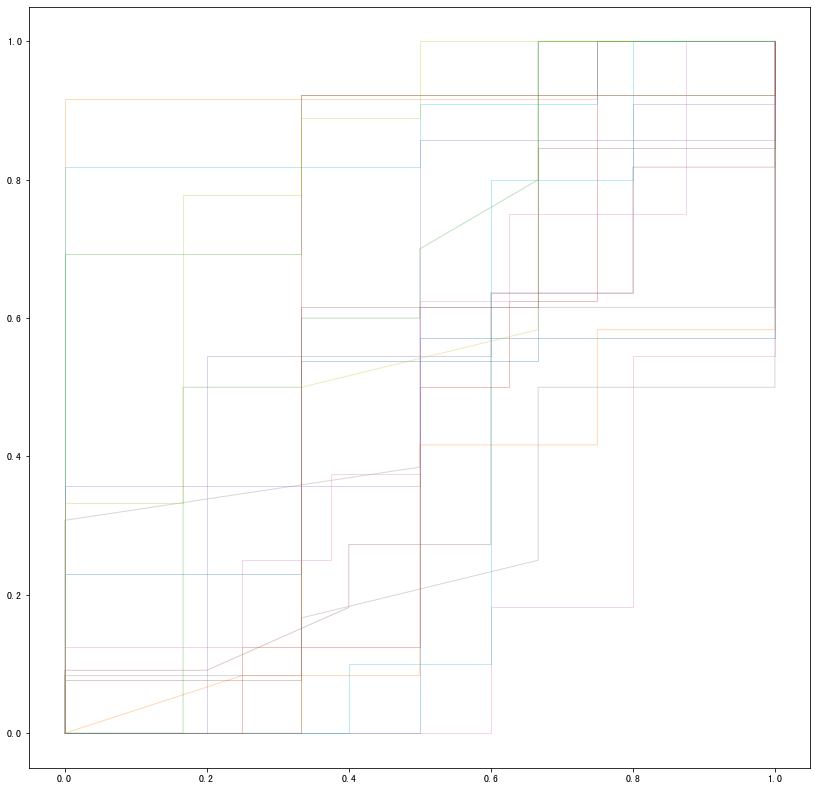

In [57]:
#定义n折交叉验证
rkf = RepeatedKFold(n_splits = 10,n_repeats =2)

#载入sklearn和scipy模块
from sklearn.metrics import roc_curve,auc

#定义空列表用于保存每次的训练结果
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)

plt.figure(figsize=(14,14))

#定义i用于绘制每次训练的ROC曲线
i=0

#data为数据集,利用KF.split划分训练集和测试集
for train_index,test_index in rkf.split(data):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    #建立模型(模型已经定义)
    model = rf
    
    #编译模型
    #model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = ['acc'])
    
    #训练模型
    model.fit(X_train,y_train)
    #利用model.predict获取测试集的预测值
    y_pred = model.predict_proba(X_test)   #X_test? or X_train
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=metrics.auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1,alpha=0.3,label='ROC fold %d(area=%0.3f)'% (i+1,roc_auc))
    i +=1